### Evaluation metrics to check random forest model 
1. Evaluation of Random Forest based on different Regression techniques
2. In this problem, we are using random forest regression to predict continuous target values 
3. Determine best fit line to model the problem 

In [1]:
#Importing libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [2]:
#Get California housing prediciton datasets 
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

x = dataset.data
y = dataset.target

### About Dataset

**Data Set Characteristics:**

-   Number of Instances-    20640

-   Number of Attributes-   8 numeric, predictive attributes and the target

-   Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

In [3]:
#Data Pre-processing (Standarization of features)
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
stand_x = standard.fit_transform(x)

In [4]:
#Model Selection: Divide datasets into training and testing sets 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(stand_x, y, test_size= 0.2, random_state= 42)

In [11]:
#Model fitting and prediction 

forest_reg = RandomForestRegressor(n_estimators= 100, random_state= 42)

forest_reg = forest_reg.fit(x_train, y_train)


In [12]:
#Model Prediction 
y_predict = forest_reg.predict(x_test)

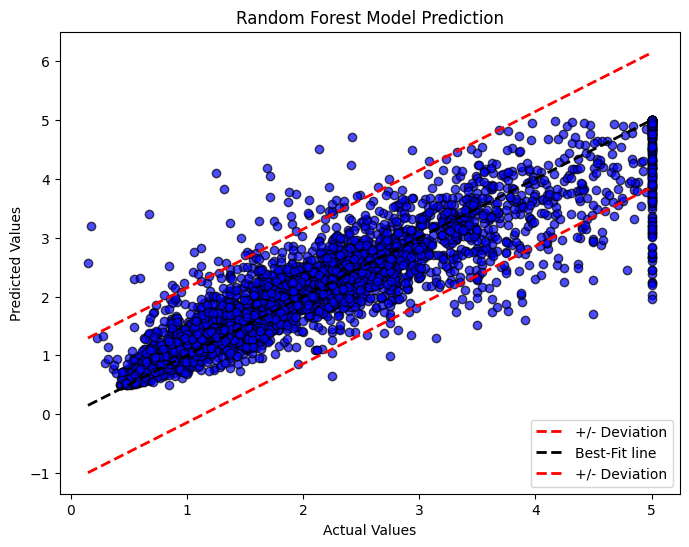

In [22]:
#Model Visualization 
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize= (8, 6))
plt.subplot(1, 1, 1)
kwgs = {'marker': 'o', 'ec': 'k', 'color': 'blue', 'alpha': 0.7}

std_test = np.std(y_test)
plt.scatter(y_test, y_predict, **kwgs)
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_test, y_test.max() - std_test], 'k--', color= 'red', lw= 2, label= '+/- Deviation')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw= 2, label= 'Best-Fit line')

plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_test, y_test.max() + std_test], 'k--', color= 'red', lw= 2, label= '+/- Deviation')
plt.title('Random Forest Model Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc= 'lower right')
plt.show()

### Model Evaluations 
1. Evaluation of model based on different regression parameters 
- Mean Absoulute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squeared Error (RMSE)
- $R^2$ Score

In [14]:
#Model Evaluation 
#Mean Absolute error 
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_predict): .3f}')
print(f'Mean Square Error: {mean_squared_error(y_test, y_predict): .3f}')
print(f'Root Mean Absolute Error: {root_mean_squared_error(y_test, y_predict): .3f}')
print(f'R2 Score: {r2_score(y_test, y_predict): .3f}')

Mean Absolute Error:  0.328
Mean Square Error:  0.255
Root Mean Absolute Error:  0.505
R2 Score:  0.805
